Copyright **`(c)`** 2023 Giovanni Squillero `<giovanni.squillero@polito.it>`  
[`https://github.com/squillero/computational-intelligence`](https://github.com/squillero/computational-intelligence)  
Free for personal or classroom use; see [`LICENSE.md`](https://github.com/squillero/computational-intelligence/blob/master/LICENSE.md) for details.  

# LAB10

Use reinforcement learning to devise a tic-tac-toe player.

### Deadlines:

* Submission: [Dies Natalis Solis Invicti](https://en.wikipedia.org/wiki/Sol_Invictus)
* Reviews: [Befana](https://en.wikipedia.org/wiki/Befana)

Notes:

* Reviews will be assigned  on Monday, December 4
* You need to commit in order to be selected as a reviewer (ie. better to commit an empty work than not to commit)

In [301]:
from itertools import combinations
from collections import namedtuple, defaultdict
from random import choice, random
from copy import deepcopy
import json

from tqdm.auto import tqdm
import numpy as np

In [302]:
State = namedtuple('State', ['x', 'o'])

In [303]:
MAGIC = [2, 7, 6, 9, 5, 1, 4, 3, 8]

In [304]:
class Color:
    RESET = '\033[0m'
    RED = '\033[91m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    BLUE = '\033[94m'
    PURPLE = '\033[95m'
    CYAN = '\033[96m'

In [305]:
def print_board(pos):
    """Nicely prints the board"""
    for r in range(3):
        for c in range(3):
            i = r * 3 + c
            if MAGIC[i] in pos.x:
                print('X', end='')
            elif MAGIC[i] in pos.o:
                print('O', end='')
            else:
                print('.', end='')
        print()
    print()

In [306]:
def win(elements):
    """Checks is elements is winning"""
    return any(sum(c) == 15 for c in combinations(elements, 3))

def state_value(pos: State):
    """Evaluate state: +1 first player wins"""
    if win(pos.x):
        return 1
    elif win(pos.o):
        return -1
    else:
        return 0
    
    

In [307]:
def random_game():
    trajectory = list()
    state = State(set(), set())
    available = set(range(1, 9+1))
    while available:
        x = choice(list(available))
        state.x.add(x)
        trajectory.append(deepcopy(state))
        available.remove(x)
        if win(state.x) or not available:
            break

        o = choice(list(available))
        state.o.add(o)
        trajectory.append(deepcopy(state))
        available.remove(o)
        if win(state.o):
            break
    return trajectory

In [308]:
"""value_dictionary = defaultdict(float)
hit_state = defaultdict(int)
epsilon = 0.001

for steps in tqdm(range(500_000)):
    trajectory = random_game()
    final_reward = state_value(trajectory[-1])
    for state in trajectory:
        hashable_state = (frozenset(state.x), frozenset(state.o))
        hit_state[hashable_state] += 1
        value_dictionary[hashable_state] = value_dictionary[
            hashable_state
        ] + epsilon * (final_reward - value_dictionary[hashable_state])"""

'value_dictionary = defaultdict(float)\nhit_state = defaultdict(int)\nepsilon = 0.001\n\nfor steps in tqdm(range(500_000)):\n    trajectory = random_game()\n    final_reward = state_value(trajectory[-1])\n    for state in trajectory:\n        hashable_state = (frozenset(state.x), frozenset(state.o))\n        hit_state[hashable_state] += 1\n        value_dictionary[hashable_state] = value_dictionary[\n            hashable_state\n        ] + epsilon * (final_reward - value_dictionary[hashable_state])'

In [309]:
alpha = 0.1
gamma = 0.98
fixed_epsilon = 0.2
# fixed_epsilon = 0.      # when optimistic initial values
# epsilon = fixed_epsilon
# GLIE approach
episodes = 200_000
k = episodes
eps_k = 0.1
b = (eps_k * k) // (1 - eps_k)


class agent:
  def __init__(self):
    # zero initialization
    self.q_table = defaultdict(lambda: np.zeros(9, dtype=float))
    # optimistic initial value
    # self.q_table = defaultdict(lambda: np.full(9, 50, dtype=float))
  
  def get_action(self, state, available_actions, epsilon=fixed_epsilon):
    '''print("Get : ")
    print(f"Epsilon : {epsilon}")'''
    if np.random.rand() < epsilon:
      action =  choice(available_actions)
      '''print(f"{Color.YELLOW}rand action: {action+1}{Color.RESET}")'''
      return action
    else:
      hashable_state = (frozenset(state.x), frozenset(state.o))
      '''print(f"cumulative exp rew :\t{self.q_table[hashable_state][available_actions]}")'''
      best_action_index = np.argmax(self.q_table[hashable_state][available_actions])
      best_action_value = self.q_table[hashable_state][available_actions][best_action_index]
      best_action = list(available_actions)[best_action_index]
      '''print(f"{Color.GREEN}best action val:{best_action_value},\tbest action: {best_action+1}{Color.RESET}")'''
      return best_action
  
  def update(self, state, action, reward, next_state, done):
    # print(f"action : {action}")
    '''print("Update : ")'''
    if done:
      target_value = reward
    else:
      hashable_next_state = (frozenset(next_state.x), frozenset(next_state.o))
      #print(f"max : {np.max(gamma * self.q_table[hashable_next_state])}")
      target_value = reward + np.max(gamma * self.q_table[hashable_next_state])
    
    '''print(f"t: {target_value}")'''
    
    hashable_state = (frozenset(state.x), frozenset(state.o))
    self.q_table[hashable_state][action] += (alpha * (target_value - self.q_table[hashable_state][action]))
    '''print(f"values : {self.q_table[hashable_state]}, value: {self.q_table[hashable_state][action]}")'''
    return
    
  def play(self, state, available_actions):
    hashable_state = (frozenset(state.x), frozenset(state.o))
    # print(f"cumulative exp rew :\t{self.q_table[hashable_state][available_actions]}")
    best_action_index = np.argmax(self.q_table[hashable_state][available_actions])
    best_action_value = self.q_table[hashable_state][available_actions][best_action_index]
    best_action = list(available_actions)[best_action_index]
    # print(f"{Color.GREEN}best action val:{best_action_value},\tbest action: {best_action+1}{Color.RESET}")
    available_actions.remove(best_action)
    return best_action, available_actions
  
  def save_q_table(self, filename):
    q_table_dict = {str(key): value.tolist() for key, value in self.q_table.items()}
    with open(filename, 'w') as file:
      json.dump(q_table_dict, file)

  def load_q_table(self, filename):
    with open(filename, 'r') as file:
      q_table_dict = json.load(file)

    self.q_table = defaultdict(lambda: np.zeros(9, dtype=float))
    for key, value in q_table_dict.items():
      for i in range(9):
        self.q_table[eval(key)] = np.array(value)

  

In [310]:
def perform_action(action, available_actions, state, turn):
    done = False
    if turn == 0:
      state.o.add(action+1)
    else:
      state.x.add(action+1)
    available_actions.remove(action)
    if len(available_actions) == 0: done = True
    return state, done

target_vector = [2, 4, 6, 8]

def get_reward(state, done, available_actions, turn=1):
    if win(state.o):
      '''print("win: o")'''
      return -100, True
    reward = 0
    count_combinations = 0

    if turn == 1:
      # if there is an action for o to win and x did not block it => reward -= 1
      # o will perform it the next turn !
      elements = list(state.o)
      for act in available_actions:
        elements.append(act+1)
        if any(sum(c) == 15 for c in combinations(elements, 3)):
          reward -= 3
        elements.remove(act+1)

    # if the action of x is blocking the winning of o => reward += 1
    # if no action is blocking the winning of o => reward = -10
    for x in state.x:
      elements = list(state.o)
      elements.append(x)
      count_combinations += sum(1 for c in combinations(elements, 3) if sum(c) == 15)
      elements.remove(x)
    reward += count_combinations
    # if x sets 3 elements at the corner (config that facilitates the win)
    reward += sum(1 for c in combinations(state.x, 3) if c in target_vector)
        
    if win(state.x):
      '''print("win: x")'''
      reward += 50
      return reward, True
    else:
      return reward, done
    
def my_player(state, available_actions, flag):
   # random player
  action = choice(available_actions)
  # win if you can
  if len(state.o) >= 2 and not any(sum(c) == 15 for c in combinations(state.o, 3)):
    elements = list(state.o)
    '''print(elements)'''
    for act in available_actions:
      elements.append(act+1)
      '''print(elements)'''
      if any(sum(c) == 15 for c in combinations(elements, 3)):
        action = act
        '''print(act+1)'''
        flag = 1
        return action, flag
      elements.remove(act+1)
  # if you can block the winning do it
  for act in available_actions:
    elements = list(state.x)
    elements.append(act+1)
    if win(elements):  # if the action make x win => prevent it
      action = act
      '''print_board(state)
      print(act+1)'''
      return action, flag
    elements.remove(act+1)
      
  return action, flag
    

In [311]:
import matplotlib.pyplot as plt
# epsilon = fixed_epsilon
a = agent()
hist  = np.zeros(10)
for i in tqdm(range(10)):
  state = State(set(), set())
  done = False
  available_actions = list(range(9))
  turn = 1
  #turn = np.random.choice([0,1])
  '''print(f"starts: {'o' if turn == 0 else 'x'}")'''
  state = State(set(), set())
  done = False
  available_actions = list(range(9))
  epsilon = 0
  while not done:
    action = a.get_action(state, available_actions, epsilon)
    # print(f"actual s: {state}")
    next_state, done = perform_action(action, available_actions, deepcopy(state), turn)
    # print(f"turn: {'o' if turn == 0 else 'x'}")
    # print(f"action: {action+1}")
    # print(f"s:{state}, ns:{next_state}")
    '''print_board(state)
    print_board(next_state)'''
    turn = 1- turn
    # print(f"next s: {next_state}")
    reward, done = get_reward(next_state, done, available_actions)
    a.update(state, action, reward, next_state, done)
    state = next_state
    '''print("----------------------------------------------")'''
    if reward == 1: hist[i] = 1
    #if done:  print_board(state)

  0%|          | 0/10 [00:00<?, ?it/s]

In [312]:
a = agent()
state = State(set(), set())
done = False
available_actions = list(range(9))
turn = 1
act = list()
while not done:
  action = a.get_action(state, available_actions)
  '''print(f"actual s: {state}")'''
  next_state, done = perform_action(action, available_actions, deepcopy(state), turn)
  act.append(action+1)
  '''print(f"turn: {'o' if turn == 0 else 'x'}")
  print(f"action: {action+1}")
  print_board(state)
  print_board(next_state)'''
  turn = 1- turn
  '''print(f"next s: {next_state}")'''
  reward, done = get_reward(next_state, done, available_actions)
  '''if done: print("done")'''
  a.update(state, action, reward, next_state, done)
  state = next_state

'''print_board(state)
print(act)'''

'print_board(state)\nprint(act)'

## Training

In [313]:
import matplotlib.pyplot as plt
# epsilon = fixed_epsilon
saves = 0
a = agent()
hist  = np.zeros(episodes)
for i in tqdm(range(episodes)):
  state = State(set(), set())
  done = False
  available_actions = list(range(9))
  #turn = 1
  turn = np.random.choice([0,1])
  '''print(f"starts: {'o' if turn == 0 else 'x'}")'''
  state = State(set(), set())
  done = False
  available_actions = list(range(9))
  epsilon = b / (b + i)
  while not done:
    flag = 0
    if turn == 1:
      # epsilon greedy player
      action = a.get_action(state, available_actions, epsilon)
      # fixed eps
      # action = a.get_action(state, available_actions)
    else:
      action, flag = my_player(state, available_actions, flag)
    # print(f"actual s: {state}")
    next_state, done = perform_action(action, available_actions, deepcopy(state), turn)
    '''if flag==1:
      print_board(next_state)'''
    # print(f"turn: {'o' if turn == 0 else 'x'}")
    # print(f"action: {action+1}")
    # print(f"s:{state}, ns:{next_state}")
    # print_board(state)
    # print_board(next_state)
    # print(f"next s: {next_state}")
    reward, done = get_reward(next_state, done, available_actions, turn)
    '''if flag == 1 and done: print("vinto o scelta")'''
    a.update(state, action, reward, next_state, done)
    state = next_state
    if reward == 1: hist[i] = 1
    turn = 1- turn
    #if done:  print_board(state)

a.save_q_table(f"q_table_{episodes}_({saves}).json")

  0%|          | 0/200000 [00:00<?, ?it/s]

In [ ]:
import matplotlib.pyplot as plt
# epsilon = fixed_epsilon
for saves in range(5):
  a = agent()
  hist  = np.zeros(episodes)
  for i in tqdm(range(episodes)):
    state = State(set(), set())
    done = False
    available_actions = list(range(9))
    #turn = 1
    turn = np.random.choice([0,1])
    '''print(f"starts: {'o' if turn == 0 else 'x'}")'''
    state = State(set(), set())
    done = False
    available_actions = list(range(9))
    epsilon = b / (b + i)
    while not done:
      flag = 0
      if turn == 1:
        # epsilon greedy player
        action = a.get_action(state, available_actions, epsilon)
        # fixed eps
        # action = a.get_action(state, available_actions)
      else:
        action, flag = my_player(state, available_actions, flag)
      # print(f"actual s: {state}")
      next_state, done = perform_action(action, available_actions, deepcopy(state), turn)
      '''if flag==1:
        print_board(next_state)'''
      # print(f"turn: {'o' if turn == 0 else 'x'}")
      # print(f"action: {action+1}")
      # print(f"s:{state}, ns:{next_state}")
      # print_board(state)
      # print_board(next_state)
      # print(f"next s: {next_state}")
      reward, done = get_reward(next_state, done, available_actions, turn)
      '''if flag == 1 and done: print("vinto o scelta")'''
      a.update(state, action, reward, next_state, done)
      state = next_state
      if reward == 1: hist[i] = 1
      turn = 1- turn
      #if done:  print_board(state)
  
  a.save_q_table(f"q_table_{episodes}_({saves}).json")

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

In [ ]:
a.save_q_table(f"q_table_{episodes}_episodes.json")

In [ ]:
a.load_q_table("q_table_200_000_(0).json")

In [ ]:

wins = 0
draws = 0
test = 1000
for _ in range(test):
    state = State(set(), set())
    available = list(range(9))
    # print(f"{[i+1 for i in available]}")
    trajectory = list()
    turn = np.random.choice([0,1])
    while available:
        if turn == 1 :
            x, available = a.play(state, available)
            # print(f"{[i+1 for i in available]} {x+1}")
            state.x.add(x+1)
            trajectory.append(deepcopy(state))
            if win(state.x):
                wins += 1
                #print("x wins")
                break
            if not available:
                draws += 1
                #print("draw")
                break
        else:
            # o = choice(available)
            o, _ = my_player(state, available, 0)
            state.o.add(o+1)
            trajectory.append(deepcopy(state))
            available.remove(o)
            # print(f"{[i+1 for i in available]} {o+1}")
            if win(state.o):
                #print("o wins")
                '''for t in trajectory:
                    print_board(t)'''
                break
            if not available:
                draws += 1
                #print("draw")
                break
        turn = 1 - turn
    '''for t in trajectory:
        print_board(t)'''
    #print_board(state)
print(f"win rate: {wins/test}")
print(f"draw rate: {draws/test}")
print(f"losts : {1 - (wins + draws)/test}")


win rate: 0.539
draw rate: 0.148
losts : 0.31299999999999994


In [ ]:
wins = 0
draws = 0
test = 1000
for _ in range(test):
    state = State(set(), set())
    available = list(range(9))
    # print(f"{[i+1 for i in available]}")
    trajectory = list()
    turn = np.random.choice([0,1])
    while available:
        if turn == 1 :
            x, available = a.play(state, available)
            # print(f"{[i+1 for i in available]} {x+1}")
            state.x.add(x+1)
            trajectory.append(deepcopy(state))
            if win(state.x):
                wins += 1
                # print("x wins")
                break
            if not available:
                draws += 1
                # print("draw")
                break
        else:
            o = choice(available)
            #o, _ = my_player(state, available, 0)
            state.o.add(o+1)
            trajectory.append(deepcopy(state))
            available.remove(o)
            # print(f"{[i+1 for i in available]} {o+1}")
            if win(state.o):
                '''print("o wins")
                for t in trajectory:
                    print_board(t)'''
                break
            if not available:
                draws += 1
                '''print("draw")'''
                break
        turn = 1 - turn
    #print_board(state)
print(f"win rate: {wins/test}")
print(f"draw rate: {draws/test}")
print(f"losts : {1 - (wins + draws)/test}")

win rate: 0.612
draw rate: 0.164
losts : 0.22399999999999998


In [315]:
for x in range(1):
  a.load_q_table(f"q_table_200000_({x})_r2.json")
  wins = 0
  draws = 0
  test = 1000
  for _ in range(test):
      state = State(set(), set())
      available = list(range(9))
      # print(f"{[i+1 for i in available]}")
      trajectory = list()
      turn = np.random.choice([0,1])
      while available:
          if turn == 1 :
              x, available = a.play(state, available)
              # print(f"{[i+1 for i in available]} {x+1}")
              state.x.add(x+1)
              trajectory.append(deepcopy(state))
              if win(state.x):
                  wins += 1
                  # print("x wins")
                  break
              if not available:
                  draws += 1
                  # print("draw")
                  break
          else:
              o = choice(available)
              #o, _ = my_player(state, available, 0)
              state.o.add(o+1)
              trajectory.append(deepcopy(state))
              available.remove(o)
              # print(f"{[i+1 for i in available]} {o+1}")
              if win(state.o):
                  '''print("o wins")
                  for t in trajectory:
                      print_board(t)'''
                  break
              if not available:
                  draws += 1
                  '''print("draw")'''
                  break
          turn = 1 - turn
      #print_board(state)
  print(f"win rate: {wins/test}")
  print(f"draw rate: {draws/test}")
  print(f"losts : {1 - (wins + draws)/test}")

win rate: 0.485
draw rate: 0.17
losts : 0.345


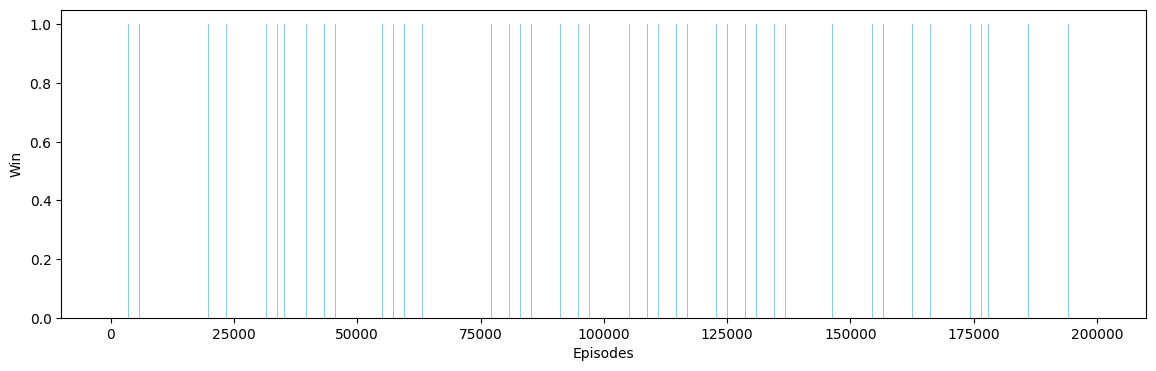

In [ ]:
plt.figure(figsize=(14, 4))
k = 10
plt.bar(range(0, len(hist), k), hist[::k], color='skyblue')

plt.xlabel('Episodes')
plt.ylabel('Win')

# Mostra il grafico
plt.show()